In [1]:
import joblib
import os
import joblib
from sklearn.metrics import f1_score, classification_report
import pandas as pd

[nltk_data] Downloading package punkt to /Users/jerry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jerry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jerry/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Transformed X_train shape: (620, 728)
Transformed X_test  shape: (267, 728)


[nltk_data] Downloading package punkt to /Users/jerry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jerry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/jerry/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Transformed X_train shape: (620, 728)
Transformed X_test  shape: (267, 728)
Decision Tree
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        42
           1       0.84      0.84      0.84        82

    accuracy                           0.79       124
   macro avg       0.77      0.77      0.77       124
weighted avg       0.79      0.79      0.79       124

KNN
               precision    recall  f1-score   support

           0       0.73      0.45      0.56        42
           1       0.77      0.91      0.83        82

    accuracy                           0.76       124
   macro avg       0.75      0.68      0.70       124
weighted avg       0.75      0.76      0.74       124

MLP
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.98      0.97        82

    accuracy                           0.96       124
   macro avg       0.96    

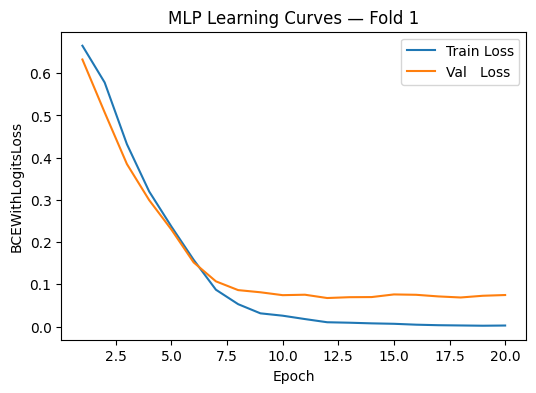

MLP Fold 1 →  F1 = 0.976


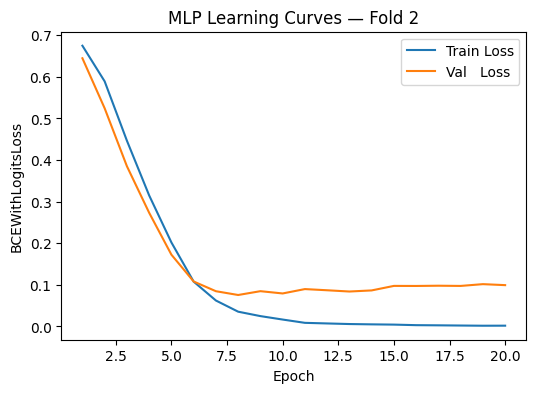

MLP Fold 2 →  F1 = 0.981


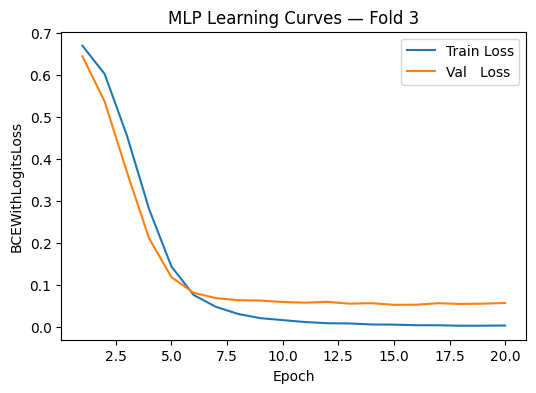

MLP Fold 3 →  F1 = 0.982


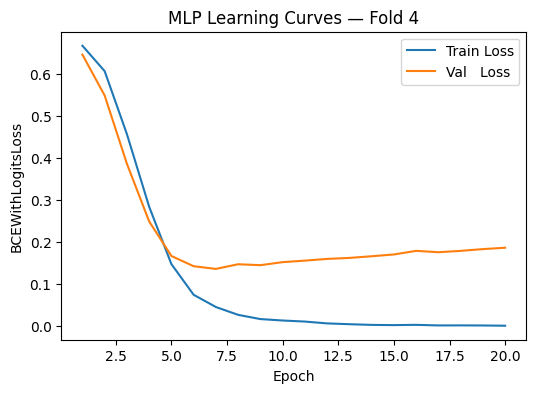

MLP Fold 4 →  F1 = 0.958


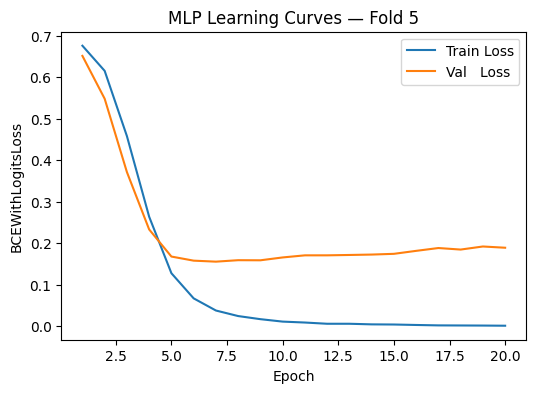

MLP Fold 5 →  F1 = 0.970

MLP  → mean F1 = 0.974,  std = 0.009


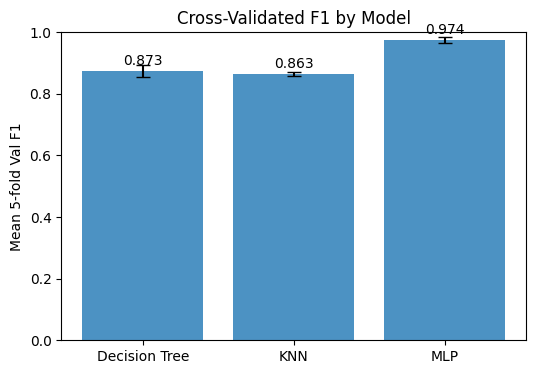

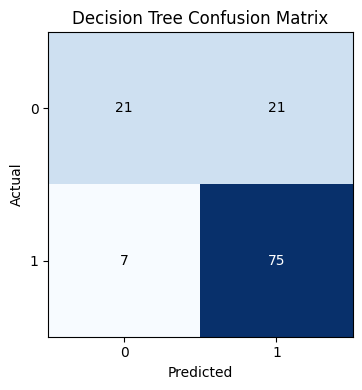

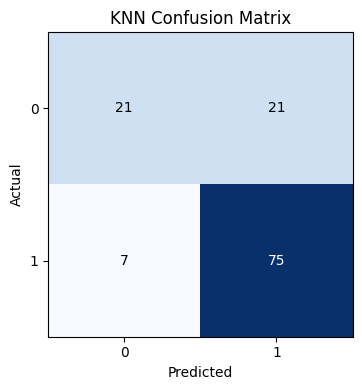

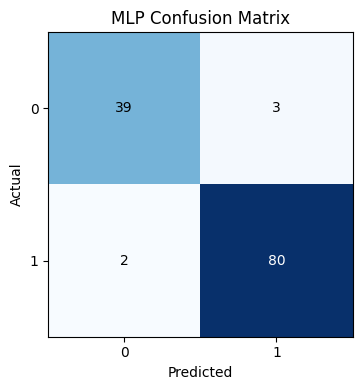

In [2]:
%run data_preprocessing.ipynb
%run train_evaluate.ipynb

In [ ]:
model_name="decision_tree_pipeline"
fname = f"{model_name.lower().replace(' ', '_')}.pkl"
path  = os.path.join("models", fname)

# # load it
model = joblib.load(path)

# # run on your test set
y_pred = model.predict(X_test)

pd.DataFrame({"prediction": y_pred}) \
  .to_csv(f"result_{model_name}.csv", index=False)


In [6]:
model_name="knn_pipeline"
fname = f"{model_name.lower().replace(' ', '_')}.pkl"
path  = os.path.join("models", fname)

# # load it
model = joblib.load(path)

# # run on your test set
y_pred = model.predict(X_test)

pd.DataFrame({"prediction": y_pred}) \
  .to_csv(f"result_{model_name}.csv", index=False)


In [ ]:
model = MLP(INPUT_DIM).to(device)
state = torch.load(f"{save_dir}/MLP.pth", weights_only=True)
model.load_state_dict(state)
model.eval()

X_tensor = torch.from_numpy(X_test_transformed).float().to(device)
with torch.no_grad():
    probs = torch.sigmoid(model(X_tensor)).cpu().numpy()
    preds  = (probs > 0.5).astype(int)             # 0/1

pd.DataFrame({"prediction": preds}).to_csv("result_MLP.csv", index=False)
print("→ Saved result.csv with", len(preds), "rows")






→ Saved result.csv with 267 rows
